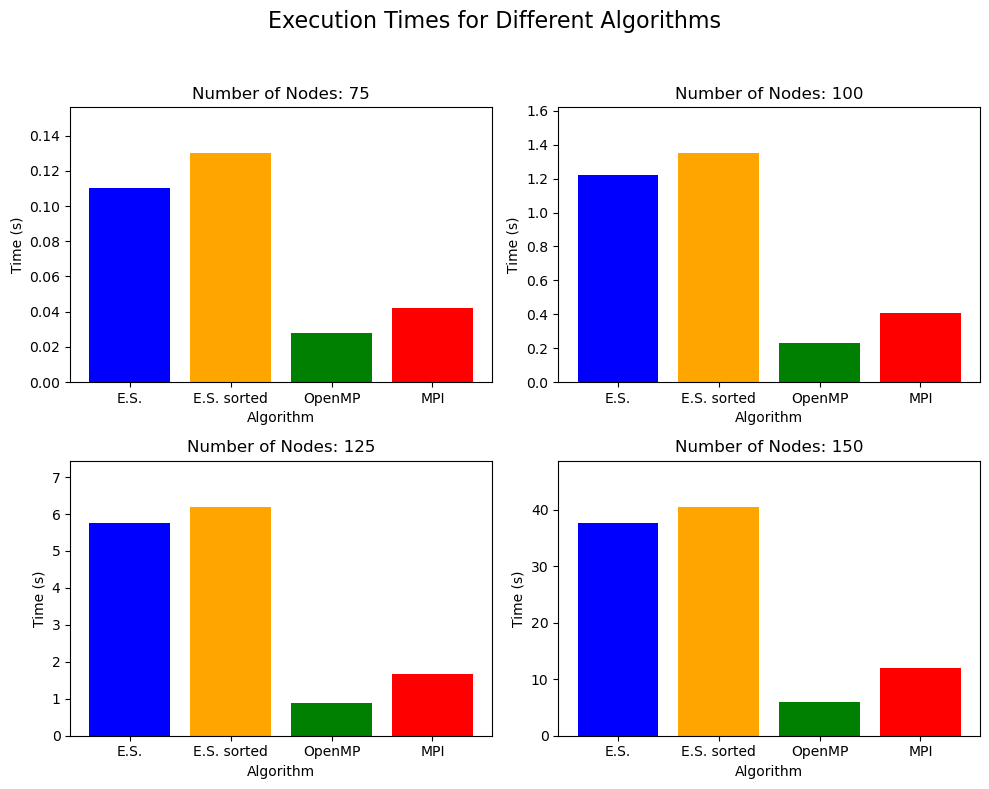

In [1]:
import matplotlib.pyplot as plt

# Dados
n_nodes = [75, 100, 125, 150, 200]
t_ex_search = [0.11, 1.22, 5.77, 37.73, 376.2]
t_ex_search_sorted = [0.13, 1.35, 6.20, 40.57, 406.57]
t_omp = [0.028, 0.23, 0.88, 6.06, 52.76]
t_mpi = [0.042, 0.41, 1.67, 12.07, 188.24]

# Configurando a grade de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Execution Times for Different Algorithms', fontsize=16)

# Rótulos e cores
labels = ['E.S.', 'E.S. sorted', 'OpenMP', 'MPI']
colors = ['blue', 'orange', 'green', 'red']

# Dados para cada gráfico
all_times = [t_ex_search, t_ex_search_sorted, t_omp, t_mpi]

# Iterando pelos gráficos (2x2)
for i, ax in enumerate(axes.flat):
    if i >= len(n_nodes):
        break
    
    node_idx = i  # Índice do número de nós correspondente
    times = [t[node_idx] for t in all_times]
    
    # Gráfico de barras para o número de nós atual
    ax.bar(labels, times, color=colors)
    ax.set_title(f'Number of Nodes: {n_nodes[node_idx]}')
    ax.set_ylabel('Time (s)')
    ax.set_xlabel('Algorithm')
    ax.set_ylim(0, max(times) * 1.2)  # Ajusta o limite do eixo Y dinamicamente

# Ajusta o layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



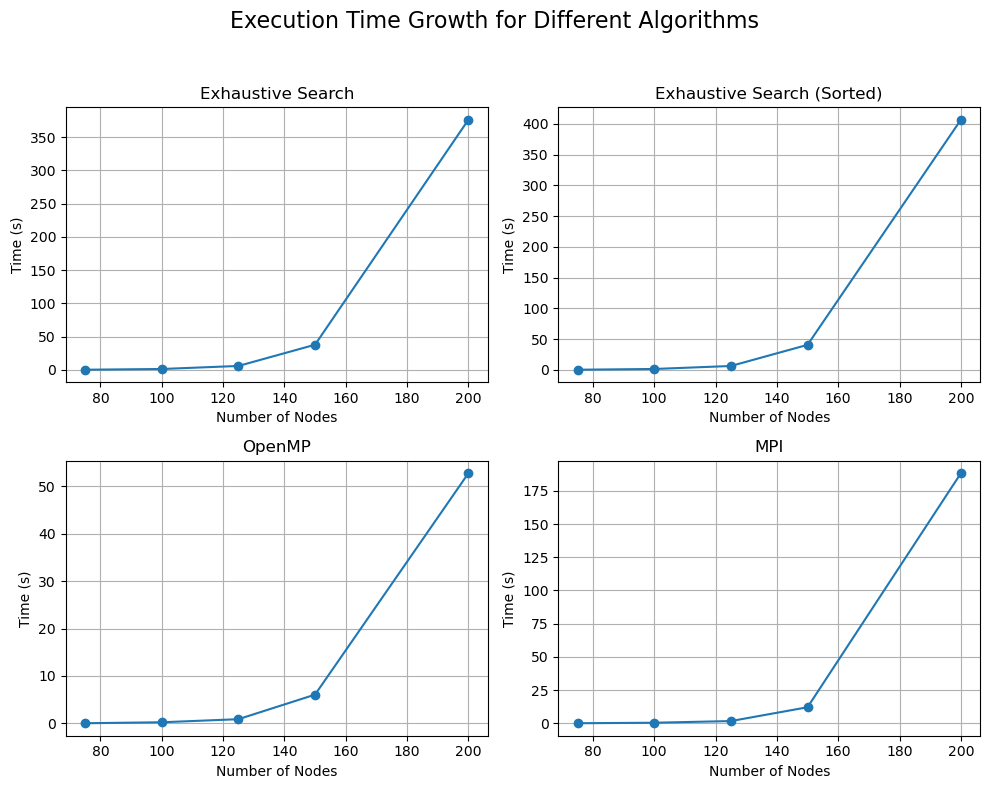

In [3]:
# Dados
n_nodes = [75, 100, 125, 150, 200]
t_ex_search = [0.11, 1.22, 5.77, 37.73, 376.2]
t_ex_search_sorted = [0.13, 1.35, 6.20, 40.57, 406.57]
t_omp = [0.028, 0.23, 0.88, 6.06, 52.76]
t_mpi = [0.042, 0.41, 1.67, 12.07, 188.24]

# Configurando os dados para cada gráfico
algorithms = [
    ('Exhaustive Search', t_ex_search),
    ('Exhaustive Search (Sorted)', t_ex_search_sorted),
    ('OpenMP', t_omp),
    ('MPI', t_mpi)
]

# Criando uma grade de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Execution Time Growth for Different Algorithms', fontsize=16)

# Itera sobre os algoritmos e eixos para plotar individualmente
for ax, (label, times) in zip(axes.flat, algorithms):
    ax.plot(n_nodes, times, marker='o')
    ax.set_title(label)
    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Time (s)')
    ax.grid()
    # ax.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
